In [420]:
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [421]:
import os
os.getcwd()

'C:\\Users\\samsung\\Desktop\\LIVERPATIENTANALYSIS'

In [422]:
os.chdir("C:/Users/samsung/Desktop/LIVERPATIENTANALYSIS")
os.getcwd()

'C:\\Users\\samsung\\Desktop\\LIVERPATIENTANALYSIS'

In [423]:
df=pd.read_csv("liver_patient_analysis.csv")

In [424]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [425]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 

df['Gender'].unique() 


array([0, 1])

In [426]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [427]:
X=df.iloc[:,:-1].values

In [428]:
X

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [429]:
y=df.iloc[:,-1].values

In [430]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,

In [431]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[9]])
X[:,[9]]=imputer.fit_transform(X[:,[9]])
df1=pd.DataFrame(X)
df1.apply(lambda X:sum(X.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [432]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)


In [433]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(466, 10) (117, 10) (466,) (117,)


In [434]:
train_mean = X_train.mean()
train_std = X_train.std()

In [435]:
X_test = (X_test - train_mean) / train_std

# classification algorithm  neural network

In [436]:
# Neural Networks# Neural 
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(predicted,y_test))

Neural Score: 
 71.67
Neural Test Score: 
 30.77
Accuracy: 
 0.3076923076923077
[[ 2  0]
 [81 34]]


In [437]:
y_pred = neural.predict(X_test)

In [438]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [439]:
fpr, tpr,thresholds= roc_curve(y_test, y_pred_proba,y_pred)

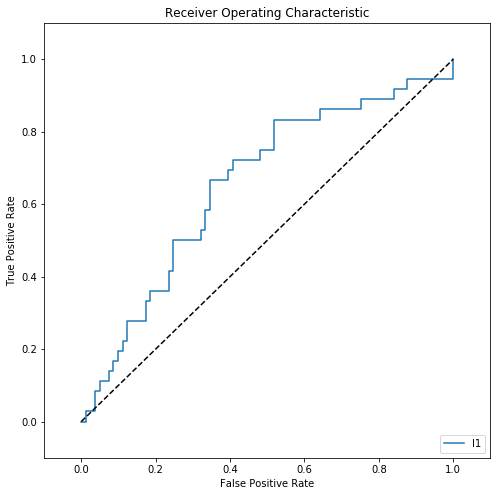

In [440]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [441]:
print(auc(fpr, tpr))

0.6536351165980796


# knn

In [442]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 11.


In [443]:
MSE.index(min(MSE))

5

In [444]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [445]:
y_pred = classifier.predict(X_test)


In [446]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

70.94017094017094

In [447]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[83, 34],
       [ 0,  0]], dtype=int64)

In [448]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [449]:
y_pred_proba[:10]

array([0.36363636, 0.36363636, 0.36363636, 0.36363636, 0.36363636,
       0.36363636, 0.36363636, 0.36363636, 0.36363636, 0.36363636])

In [454]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,y_pred)

In [455]:
print(auc(fpr, tpr))

0.5060240963855421


# svm

In [465]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [466]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [467]:
y_pred = model.predict(X_test)

In [468]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [83, 34]], dtype=int64)

In [469]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [470]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,y_pred)

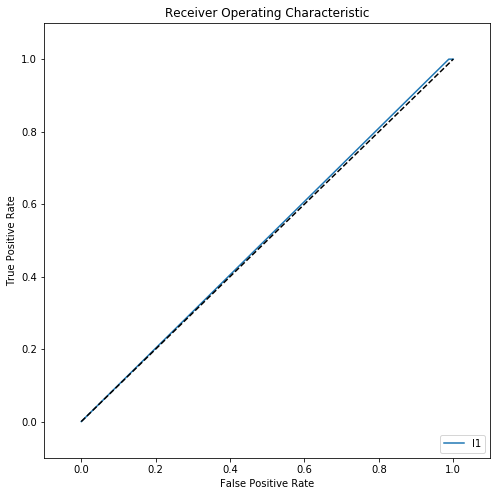

In [471]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [472]:
print(auc(fpr, tpr))

0.5060240963855422
